In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [24]:
plt.style.use('seaborn-v0_8') #Stylings
sns.set_palette("husl")

In [25]:
df = pd.read_excel(r'StudentsPerformanceDataset.xlsx')
print(f"Dataset shape: {df.shape}")

Dataset shape: (300, 20)


In [26]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 non-null    fl

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,54518.876589,6.993096,1.670011,5.468870,5.763599,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,24845.101039,1.734910,0.840759,2.559495,2.476379,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,10111.301178,4.012623,0.101284,1.018167,1.048115,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,32842.034240,5.450614,0.953231,3.226739,4.106060,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,56120.473769,7.144770,1.735533,5.536846,5.873572,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,74997.618701,8.417073,2.436196,7.683439,7.751822,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,99593.244163,9.998283,2.998452,9.995895,9.902960,9.978605,9.000000,67.295712


In [27]:
print(df.isnull().sum())

Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64


In [28]:
le = LabelEncoder()
categorical_features = ['Gender', 'Parental_Education', 'Internet_Access', 'Tutoring_Classes', 'Sports_Activity', 'Extra_Curricular', 'School_Type', 'Teacher_Feedback']

for col in categorical_features:
    df[f'{col}_Encoded'] = le.fit_transform(df[col]) # OHE

In [29]:
exclude_cols = ['Student_ID', 'Final_Score', 'Gender', 'Parental_Education', 'Internet_Access', 'Tutoring_Classes', 'Sports_Activity', 'Extra_Curricular', 'School_Type', 'Teacher_Feedback']
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols]
y = df['Final_Score']
feature_cols

['Study_Hours_per_Week',
 'Attendance_Percentage',
 'Previous_Sem_Score',
 'Family_Income',
 'Sleep_Hours',
 'Travel_Time',
 'Test_Anxiety_Level',
 'Peer_Influence',
 'Motivation_Level',
 'Library_Usage_per_Week',
 'Gender_Encoded',
 'Parental_Education_Encoded',
 'Internet_Access_Encoded',
 'Tutoring_Classes_Encoded',
 'Sports_Activity_Encoded',
 'Extra_Curricular_Encoded',
 'School_Type_Encoded',
 'Teacher_Feedback_Encoded']

In [30]:
y.describe()

count    300.000000
mean      41.454265
std        9.989541
min       17.916539
25%       34.401047
50%       41.596899
75%       48.210497
max       67.295712
Name: Final_Score, dtype: float64

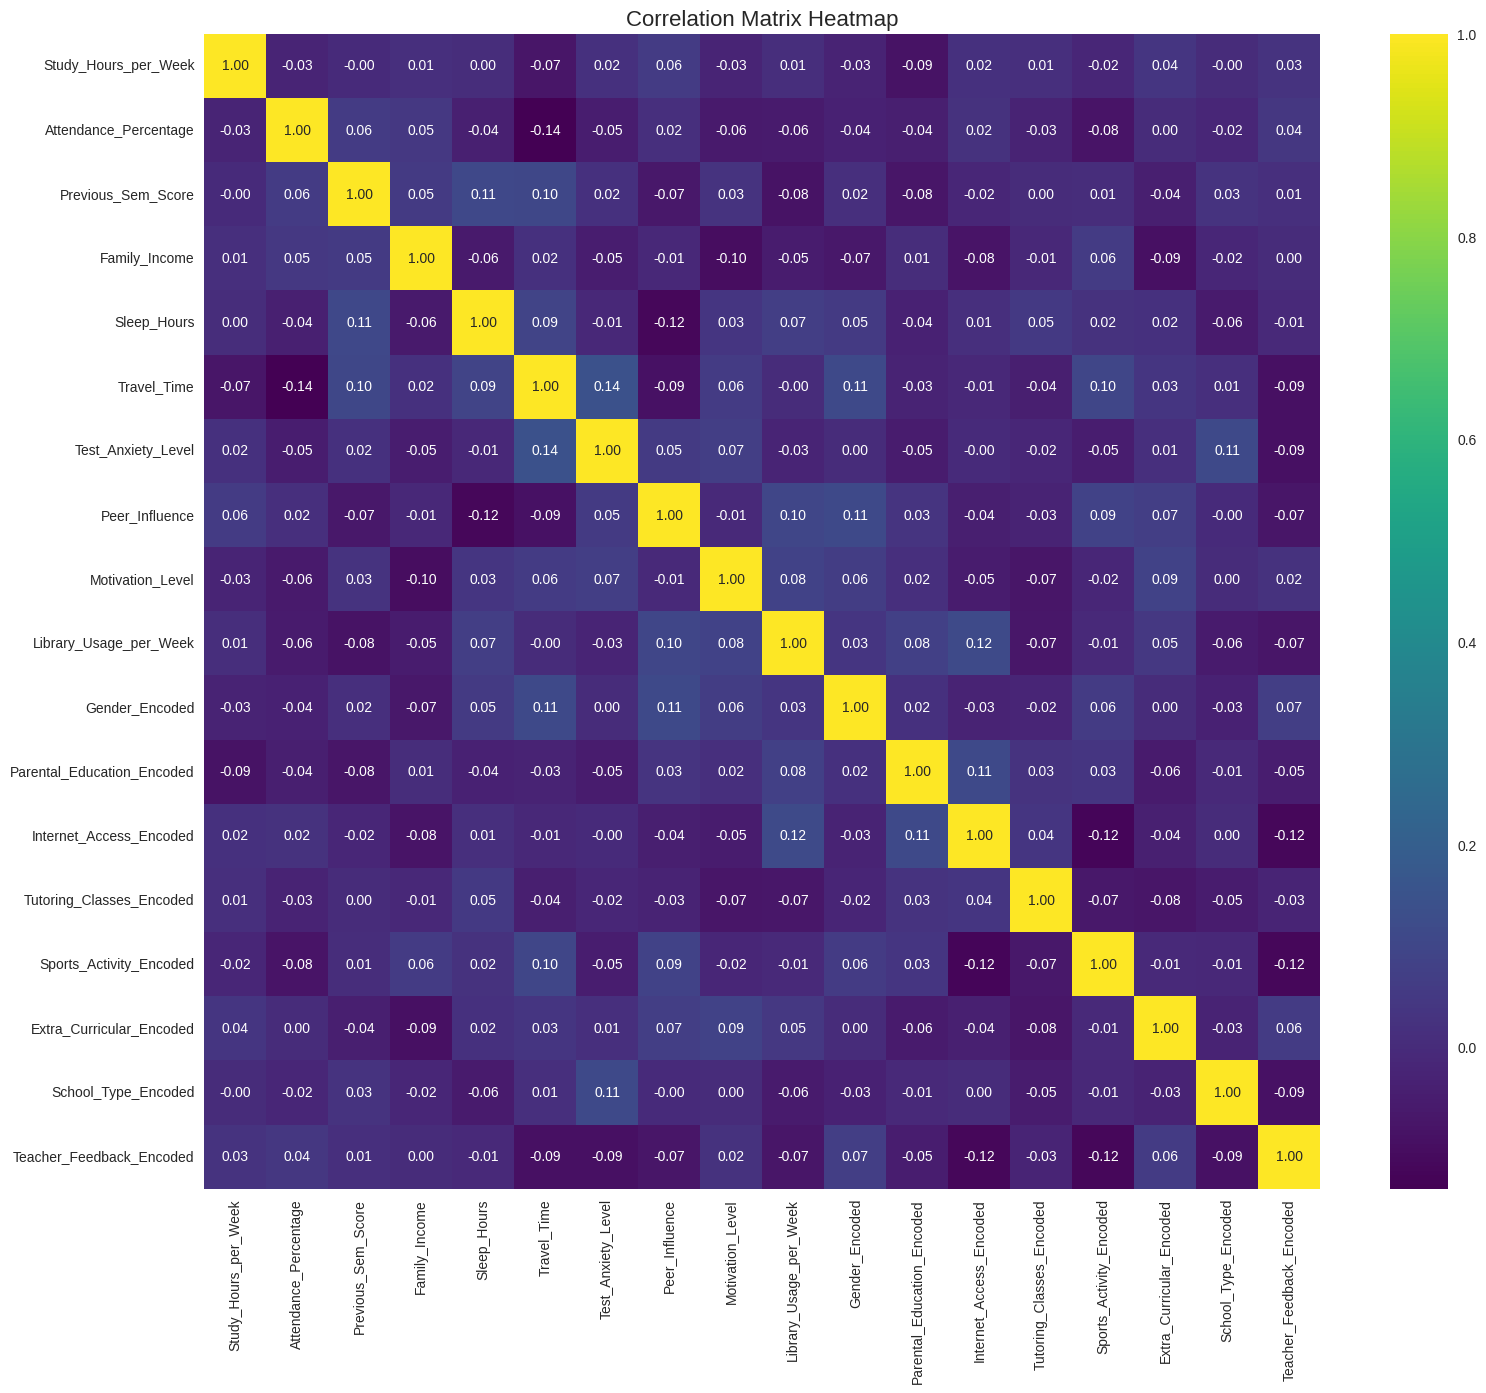

In [31]:
correlation_matrix = df[feature_cols].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [32]:
print("Top 10 Features Correlated with Final Score: ")
correlations = df[feature_cols + ['Final_Score']].corr()['Final_Score'].sort_values(ascending=False)
print(correlations.head(11)[1:]) 

Top 10 Features Correlated with Final Score: 
Previous_Sem_Score          0.632940
Study_Hours_per_Week        0.464599
Attendance_Percentage       0.335473
Family_Income               0.090093
Teacher_Feedback_Encoded    0.079710
Extra_Curricular_Encoded    0.025958
Sleep_Hours                 0.021040
School_Type_Encoded         0.001950
Gender_Encoded             -0.005002
Internet_Access_Encoded    -0.013847
Name: Final_Score, dtype: float64


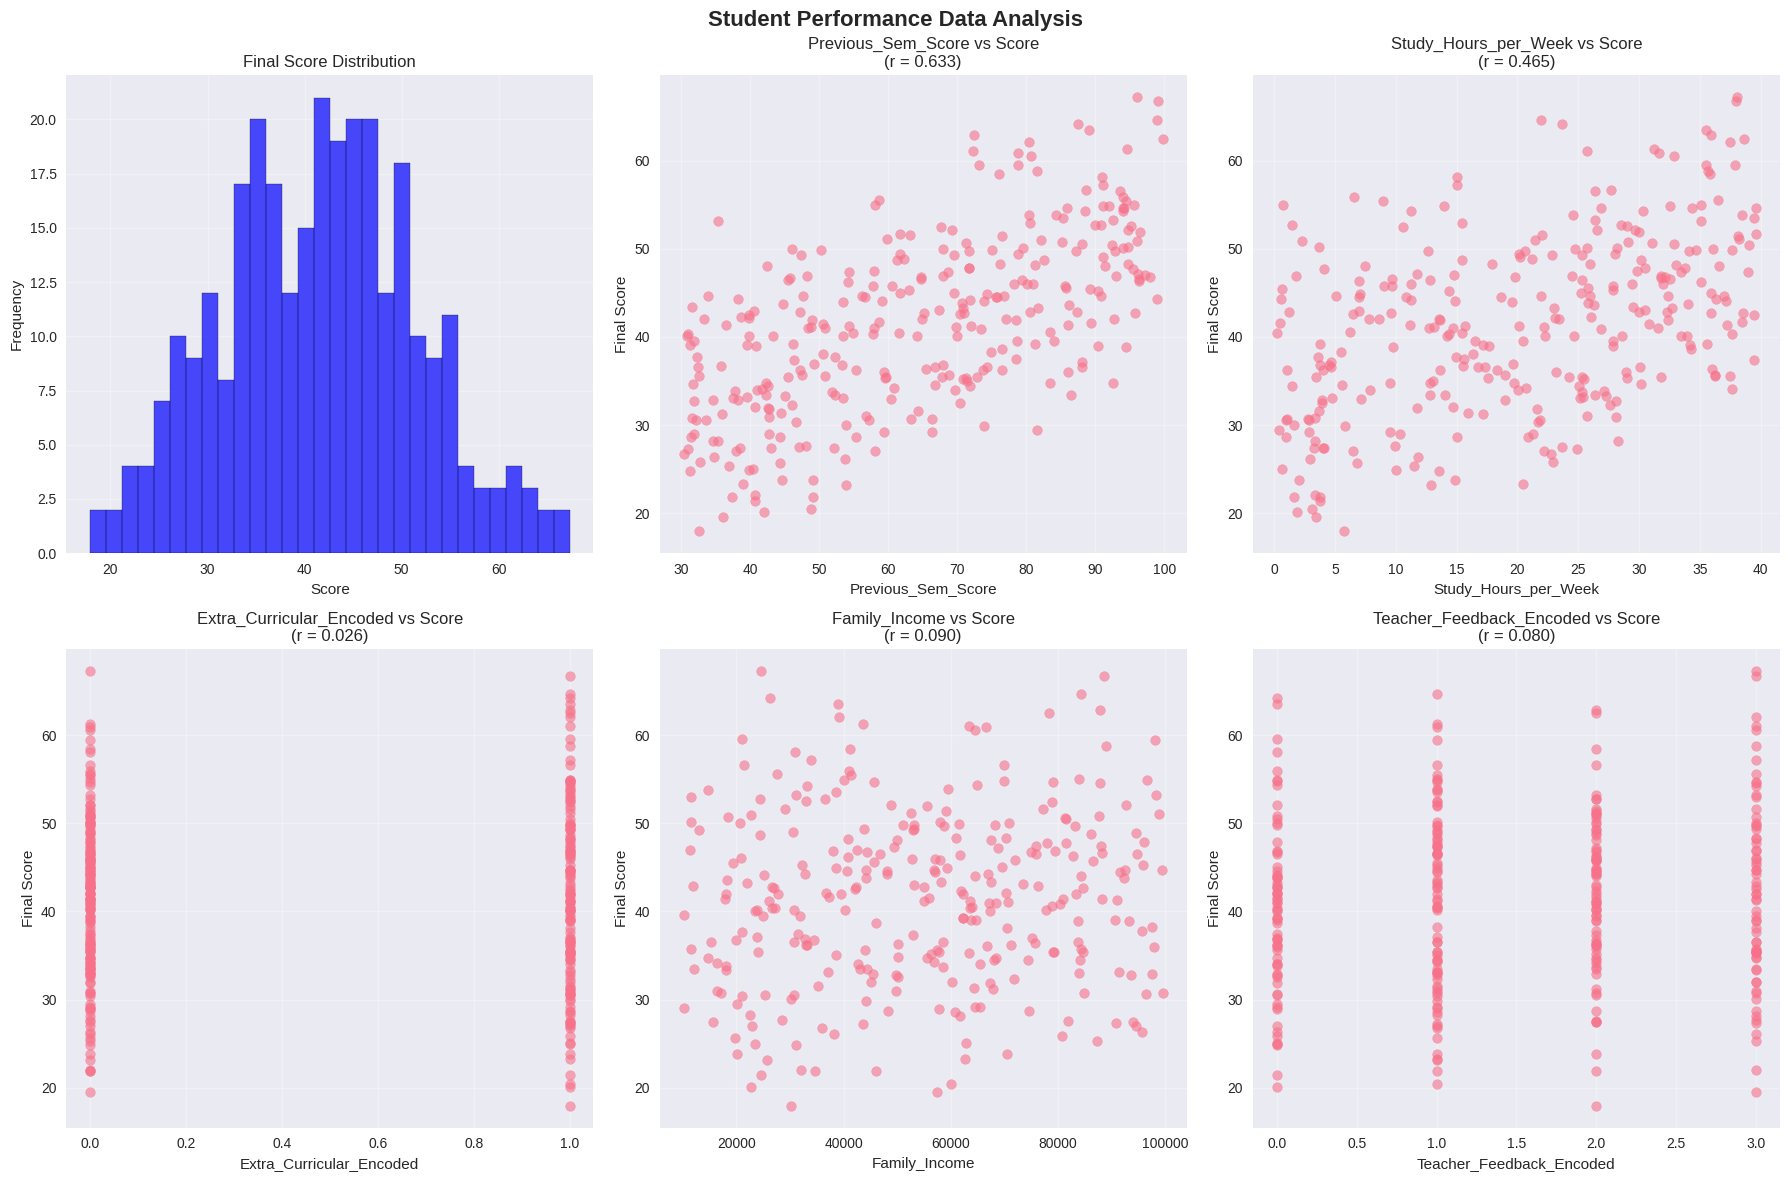

In [33]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Student Performance Data Analysis', fontsize=16, fontweight='bold')

# Score distribution
axes[0, 0].hist(y, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Final Score Distribution')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Top correlations
top_features = correlations.head(7)[1:].index  # Top 5 excluding self
for i, feature in enumerate(top_features):
    if i < 7:
        row = i // 3
        col = (i + 1) % 3
        if row == 0 and col == 0:
            continue  # Skip first position (already used)
        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Score\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Final Score')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 18)
(60, 18)
(240,)
(60,)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.48504814, -0.17640902, -0.22896924, ..., -0.95118973,
         1.00836835, -0.44817719],
       [-1.39293354, -0.36284045,  0.31565038, ..., -0.95118973,
        -0.9917011 , -1.367515  ],
       [ 0.36515297,  0.6242982 , -0.88067102, ..., -0.95118973,
        -0.9917011 ,  0.47116063],
       ...,
       [-0.50894073,  1.44360146,  1.30054522, ...,  1.05131497,
        -0.9917011 ,  1.39049845],
       [ 0.27283665,  1.64610774,  1.16062076, ...,  1.05131497,
        -0.9917011 , -1.367515  ],
       [ 0.82178352,  0.20722837, -1.59053508, ..., -0.95118973,
        -0.9917011 ,  1.39049845]])

In [36]:
print("Features scaled using StandardScaler")

k_features = min(15, len(feature_cols)) 
selector = SelectKBest(score_func=f_regression, k=k_features)  
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(f"Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

Features scaled using StandardScaler
Feature Selection: Top 15 features selected
Selected features: ['Study_Hours_per_Week', 'Attendance_Percentage', 'Previous_Sem_Score', 'Family_Income', 'Test_Anxiety_Level', 'Peer_Influence', 'Motivation_Level', 'Library_Usage_per_Week', 'Gender_Encoded', 'Parental_Education_Encoded', 'Internet_Access_Encoded', 'Tutoring_Classes_Encoded', 'Extra_Curricular_Encoded', 'School_Type_Encoded', 'Teacher_Feedback_Encoded']


In [37]:
# Train the model
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("Model trained")
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

Model trained


In [38]:

def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f} points")
    print(f"MAE: {mae:.2f} points")
    print(f"MAPE: {mape:.2f}%")
    
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")


Training Set Performance:
R² Score: 0.7383
RMSE: 5.13 points
MAE: 4.08 points
MAPE: 10.53%

Test Set Performance:
R² Score: 0.6488
RMSE: 5.76 points
MAE: 4.74 points
MAPE: 12.42%


In [39]:
# Check for overfitting
print(f"R² difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("Generalized model - Check")
else:
    print("Overfitting detected")

R² difference (Train - Test): 0.0895
Overfitting detected


In [40]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Importance (Top {k_features}):")
print(feature_importance.head(k_features))


Feature Importance (Top 15):
                       Feature  Coefficient  Abs_Coefficient
2           Previous_Sem_Score     6.269997         6.269997
0         Study_Hours_per_Week     4.929545         4.929545
1        Attendance_Percentage     3.028027         3.028027
7       Library_Usage_per_Week    -0.672227         0.672227
12    Extra_Curricular_Encoded     0.415844         0.415844
11    Tutoring_Classes_Encoded    -0.320085         0.320085
5               Peer_Influence    -0.306160         0.306160
4           Test_Anxiety_Level    -0.277149         0.277149
10     Internet_Access_Encoded     0.185365         0.185365
8               Gender_Encoded     0.181302         0.181302
6             Motivation_Level    -0.158767         0.158767
13         School_Type_Encoded    -0.155921         0.155921
14    Teacher_Feedback_Encoded     0.077000         0.077000
3                Family_Income    -0.072682         0.072682
9   Parental_Education_Encoded     0.036385         0.0

In [41]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Model Results (Student Scores)', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Score')
axes[0, 0].set_ylabel('Predicted Score')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='green', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Score')
axes[0, 1].set_ylabel('Predicted Score')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Score')
axes[1, 0].set_ylabel('Residuals (points)')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# Feature importance
top_features_plot = feature_importance.head(k_features)
# Sort for plotting (largest coefficient at top)
top_features_plot = top_features_plot.iloc[::-1] 
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title(f'Top {k_features} Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('student_model_results.png') # Save the plot
plt.close(fig) # Close the plot

In [42]:

scenarios = [
    {
        'name': 'High Achiever',
        'data': {
            'Study_Hours_per_Week': 35.0, 'Attendance_Percentage': 95.0, 'Previous_Sem_Score': 90.0,
            'Family_Income': 70000.0, 'Sleep_Hours': 7.0, 'Travel_Time': 1.0, 'Test_Anxiety_Level': 2.0,
            'Peer_Influence': 3.0, 'Motivation_Level': 9.0, 'Library_Usage_per_Week': 8,
            'Gender_Encoded': 1, 'Parental_Education_Encoded': 2, 'Internet_Access_Encoded': 1,
            'Tutoring_Classes_Encoded': 1, 'Sports_Activity_Encoded': 1, 'Extra_Curricular_Encoded': 1,
            'School_Type_Encoded': 0, 'Teacher_Feedback_Encoded': 0
        }
    },
    {
        'name': 'Struggling Student',
        'data': {
            'Study_Hours_per_Week': 5.0, 'Attendance_Percentage': 60.0, 'Previous_Sem_Score': 40.0,
            'Family_Income': 30000.0, 'Sleep_Hours': 5.0, 'Travel_Time': 2.5, 'Test_Anxiety_Level': 8.0,
            'Peer_Influence': 7.0, 'Motivation_Level': 3.0, 'Library_Usage_per_Week': 1,
            'Gender_Encoded': 0, 'Parental_Education_Encoded': 1, 'Internet_Access_Encoded': 0,
            'Tutoring_Classes_Encoded': 0, 'Sports_Activity_Encoded': 0, 'Extra_Curricular_Encoded': 0,
            'School_Type_Encoded': 1, 'Teacher_Feedback_Encoded': 2
        }
    },
    {
        'name': 'Average Student',
        'data': {
            'Study_Hours_per_Week': 20.0, 'Attendance_Percentage': 80.0, 'Previous_Sem_Score': 65.0,
            'Family_Income': 45000.0, 'Sleep_Hours': 6.5, 'Travel_Time': 1.5, 'Test_Anxiety_Level': 5.0,
            'Peer_Influence': 5.0, 'Motivation_Level': 6.0, 'Library_Usage_per_Week': 4,
            'Gender_Encoded': 1, 'Parental_Education_Encoded': 1, 'Internet_Access_Encoded': 1,
            'Tutoring_Classes_Encoded': 0, 'Sports_Activity_Encoded': 1, 'Extra_Curricular_Encoded': 0,
            'School_Type_Encoded': 0, 'Teacher_Feedback_Encoded': 1
        }
    }
]

# Ensure the columns in the DataFrame match the feature_cols order
for scenario in scenarios:
    sample_df = pd.DataFrame([scenario['data']])[feature_cols] # Order columns correctly
    sample_scaled = scaler.transform(sample_df)
    sample_selected = selector.transform(sample_scaled)
    prediction = model.predict(sample_selected)[0]
    
    print(f"\n{scenario['name']}:")
    print(f"  Predicted Score: {prediction:.2f}")
    key_features = ['Study_Hours_per_Week', 'Attendance_Percentage', 'Previous_Sem_Score', 'Test_Anxiety_Level', 'Motivation_Level']
    for feature in key_features:
        if feature in scenario['data']:
            print(f"  {feature}: {scenario['data'][feature]}")


High Achiever:
  Predicted Score: 60.36
  Study_Hours_per_Week: 35.0
  Attendance_Percentage: 95.0
  Previous_Sem_Score: 90.0
  Test_Anxiety_Level: 2.0
  Motivation_Level: 9.0

Struggling Student:
  Predicted Score: 26.21
  Study_Hours_per_Week: 5.0
  Attendance_Percentage: 60.0
  Previous_Sem_Score: 40.0
  Test_Anxiety_Level: 8.0
  Motivation_Level: 3.0

Average Student:
  Predicted Score: 44.26
  Study_Hours_per_Week: 20.0
  Attendance_Percentage: 80.0
  Previous_Sem_Score: 65.0
  Test_Anxiety_Level: 5.0
  Motivation_Level: 6.0


In [43]:
# Summary
print("\nModel Summary:")
print(f"Model successfully trained on {len(X_train)} samples")
print(f"Test R² Score: {test_metrics['R2']:.4f}")
print(f"Test RMSE: {test_metrics['RMSE']:.2f} points")
print(f"Model can predict student scores with {test_metrics['R2']*100:.1f}% accuracy")
print(f"Most important factor: {feature_importance.iloc[0]['Feature']}")


Model Summary:
Model successfully trained on 240 samples
Test R² Score: 0.6488
Test RMSE: 5.76 points
Model can predict student scores with 64.9% accuracy
Most important factor: Previous_Sem_Score


In [44]:
import joblib


joblib.dump(model, 'student_score_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selector, 'student_feature_selector.pkl')

print("Model, Scaler and Selector saved successfully.")

Model, Scaler and Selector saved successfully.
